## Stats507 Homework 5, February 22, 2019
### Israel Diego  [(Go to Home Page)](https://israeldi.github.io/Stats507/) 
#### israeldi@umich.edu

This notebook shows solutions to homework 5 for Stats507

## Table of Contents

1. [Problem 1: Warmup: Around the Semicircular Law](#Problem-1:-Warmup:-Around-the-Semicircular-Law)
2. [Problem 2: Plotting a Mixture of Normals](#Problem-2:-Plotting-a-Mixture-of-Normals)
3. [Problem 3: Conway’s Game of Life](#Problem-3:-Conway’s-Game-of-Life)

### Problem 1: Warmup: Around the Semicircular Law  
#### ([Back to Top](#Table-of-Contents))
The (comparatively) young field of random matrix theory (RMT) concerns the behavior of certain matrices with independent random entries. A landmark result in RMT concerns the behavior of the eigenvalues of a random symmetric matrix with normal entries. Under the proper scaling, the joint distribution of the eigenvalues of such a matrix follows the *Wigner semicircular distribution*, which has density
\begin{equation}
f(x)=\begin{cases}
\frac{\sqrt{4-x^{2}}}{2\pi} & \textrm{if } -2\leq x\leq2\\
0 & \textrm{otherwise.}
\end{cases}
\end{equation}

That is, a symmetric matrix with random normal entries will have eigenvalues whose histogram looks more and more like a semicircle of radius $2$ as $n$ increases to $\infty$. In particular, define a matrix-valued random variable $Z\in\mathbb{R}^{n\times n}$ by generating $Z_{i,j}$ i.i.d. normal with mean $0$ and variance $1/n$ for all $1\leq i\leq j\leq n$, and set $Z_{j,i}=Z_{i,j}$ for $1\leq i\leq j\leq n$. Then the matrix $Z\in\mathbb{R}^{n\times n}$ is called a Wigner matrix.

1. Define a function `wigner_density` that takes a single number (integer or float) as its input and returns a float as its output, given by the value of the semicircular density evaluated at the input. That is, for a number `x`, `wigner_density(x)` should return $f(x)$, where $f$ is defined above in Equation $(1)$. You do not need to perform any error checking in this function, but note that your function should operate equally well on Python ints/floats and on `numpy` ints/floats, and you should be able to accomplish this without checking the type of the input. Use the `numpy.sqrt` function for the square root, *not* the Python `math.sqrt` function.

In [2]:
import numpy as np, math

def wigner_density(x):
    if (x < 2) and (x > -2):
        return(np.sqrt(4.0 - x**2) / (2* math.pi))
    return 0.0

2. Define a function `generate_wigner` that takes a single positive integer `n` as its argument and returns a random $n$-by-$n$ Wigner matrix. Your function should raise an appropriate error in the event that the input is not an integer or if it is not positive. The output of your function may be either a `numpy` matrix or simply a `numpy` array. I would slightly recommend the former, for ease of use in the next subproblem. You can cast a $2$-dimensional `numpy` array `a` to a matrix by writing `np.matrix(a)`. **Hint:** depending on the solution you choose, you may find the `numpy.triu` and `numpy.tril` functions to be useful. A different solution makes use of the `scipy.spatial.distance.squareform` function.

In [3]:
def generate_wigner(n):
    # Error Checking
    if not isinstance(n, int):
        raise TypeError('Input should be an integer!')
    elif n <= 0:
        raise ValueError('Input should be positive!')
    
    # Create our Symmetric matrix
    Z = np.reshape( np.random.normal(loc = 0, scale = np.sqrt(1 / n), size = n * n), (n, n) )
    i_lower = np.tril_indices(n, -1)
    Z[i_lower] = Z.T[i_lower]
    return Z

3. The RMT result referenced above states that the joint distribution of the eigenvalues of a random Wigner matrix converges to the semicircular law. Write a function `get_spectrum` that takes a `numpy` matrix or $2$-dimensional `numpy` array and returns a `numpy` array of its eigenvalues in non-decreasing order. You do not need to perform any error checking for this function. You fill find the following documentation useful: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh.

In [4]:
def get_spectrum(Z):
    eigVals, eigVecs = np.linalg.eigh(Z)
    return(eigVals)

4. Create a plot with four subplots, arranged vertically, each showing a (normalized) histogram, in blue, of the eigenvalues of a random $n$-by-$n$ Wigner matrix for $n = 100, 200, 500$ and $1000$. In each subplot, overlay a red curve indicating the density of the semicircular law, as defined in $(1)$. **Hint:** depending on how you implemented `wigner_density` above, you may find the `numpy.vectorize` function helpful.

How big does $n$ have to be before the semicircular law appears to be a good fit? Of course, in practice, we would answer this question more rigorously with, for example, a Kolmogorov-Smirnov test, which you can find in the `scipy.stats` module, but that is entirely optional. **Note:** this experiment involves some matrix eigenvalue computations, which are comparatively expensive. If you set $n$ larger than about $5000$, be prepared to wait a few minutes for your answer, especially if you are running on a laptop.

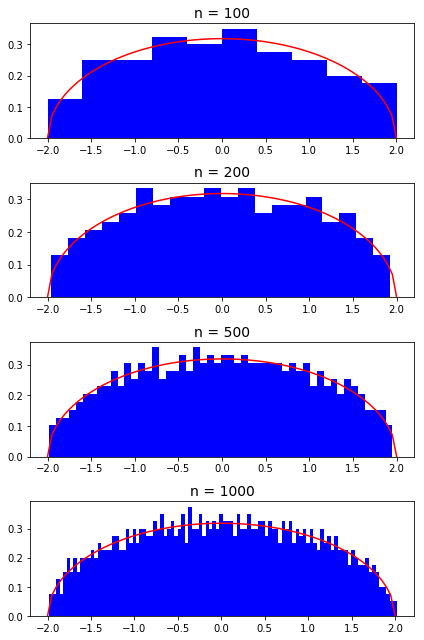

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating Wigner Matrix eigen values for each n
n = [100, 200, 500, 1000]
Z_n = list(map(generate_wigner, n))
eigVals_n = list(map(get_spectrum, Z_n))

# Setting up wigner density for plotting
x = np.arange(-2.0, 2.05, 0.05)
wigner_density_Vec = np.vectorize(wigner_density)

# Plot our 4 subplots for n = [100, 200, 500, 1000]. We use a for loop 
# to avoid duplicate code
for i in range(len(n)):
    plt.rcParams['figure.figsize'] = [6, 9]
    plt.subplot(int(str(len(n)) + '1' + str(i + 1)))
    plt.hist(eigVals_n[i], bins = int(n[i] /10), density = True, facecolor = 'blue')
    plt.plot(x, wigner_density_Vec(x), 'r')
    plt.title('n = ' + str(n[i]), fontsize = 14)
_ = plt.tight_layout()

- *Looking at the subplots above, $n = 500$ and $n = 1000$ both appear to be good fits, provided that the number of bins is set to $10\%$ of the value of $n$*

### Problem 2: Plotting a Mixture of Normals
#### ([Back to Top](#Table-of-Contents))
The whole reason that we use plotting software is to visualize the data that we are working with, so let’s do that. The zip file located at http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/hw5_files.zip contains two files, storing data from an experiment in my own research. The file `points.dlm` is a tab-delimited file (`.dlm` stands for “delimited”). Such a format is common when writing reasonably small files, and is useful if you expect to use a data set across different programs or platforms. See the documentation for the command `numpy.loadtxt` to see how to read this file. The file `labels.npy` is a numpy binary file, representing a `numpy` object. The `.npy` file format is specific to `numpy`. Many languages (e.g., R and MATLAB) have their own such language-specific file formats for saving variables, workspaces, etc. These formats tend to be more space-efficient, typically at the cost of program-dependence. It is best to avoid such files if you expect to deal with the same data set in several different environments (e.g., you run experiments in MATLAB and do your statistical analysis in R). `.npy` files are opened using `numpy.load`.

The observations in my experiment were generated from a distribution that is *approximately* normal, but not precisely so. Let’s explore how well the normal approximation holds.

1. Download the .zip file, extract it, and read the two files into `numpy`. Please include both `labels.npy` and `points.dlm` in your final submission. The former of these should yield a `numpy` array of 0s and 1s, and the latter should yield a $100$-by-$2$ `numpy` array, in which each row corresponds to a $2$-dimensional point. The $i$-th entry of the array in `labels.npy` corresponds to the cluster membership label of the $i$-th row of the matrix stored in `points.dlm`.

In [6]:
import matplotlib

# Load Files
points = np.loadtxt('./hw5_files/points.dlm')
labels = np.load('./hw5_files/labels.npy')

2. Generate a scatter plot of the data. Each data point should appear as an `x` (often called a *cross* in data visualization packages), colored according to its cluster membership as given by `points.npy`. The points with cluster label $0$ should be colored blue, and those with cluster label $1$ should be colored red. Set the x and y axes to both range from $0$ to $1$. Adjust the size of the point markers to what you believe to be reasonable (i.e., aesthetically pleasing, visible, etc).

Text(0.5,1,'Scatter Plot of Points')

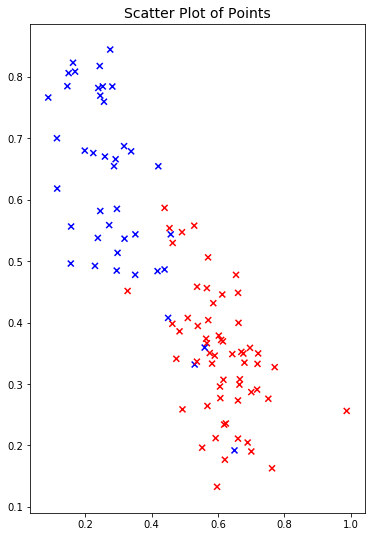

In [7]:
colors = ['blue','red']

# Scatter Plot
plt.rcParams['figure.figsize'] = [6, 9]
plt.scatter(points[:,0], points[:,1], c = labels, cmap = matplotlib.colors.ListedColormap(colors), marker = "x")
plt.title('Scatter Plot of Points', fontsize = 14)

3. Theoretically, the data should approximate a mixture of normals with means and covariance matrices given by
\begin{align*}
\mu_{0}=(0.2,0.7)^{T}, & \Sigma_{0}=\left[\begin{array}{cc}
0.015 & -0.011\\
-0.011 & 0.018
\end{array}\right],\\
\mu_{1}=(0.65,0.3)^{T}, & \Sigma_{1}=\left[\begin{array}{cc}
0.016 & -0.011\\
-0.011 & 0.016
\end{array}\right].
\end{align*}
For each of these two normal distributions, add two contour lines corresponding to $1$ and $2$ “standard deviations” of the distribution. We will take the $1$-standard deviation contour to be the level set (which is an ellipse) of the normal distribution that encloses probability mass $0.68$ of the distribution, and the $2$-standard deviation contour to be the level set that encloses probability mass $0.95$ of the distribution. The contour lines for cluster $0$ should be colored blue, and the lines for cluster $1$ should be colored red. The contour lines will go off the edge of the $1$-by-$1$ square that we have plotted. Do not worry about that. **Hint:** these ellipses are really just confidence regions given by 
\begin{align*}(x-\mu)^{T}\Sigma^{-1}(x-\mu)\leq\chi_{2}^{2}(p),\end{align*}
where $p$ is a probability and $\chi_{d}^{2}$ is the quantile function for $\chi^{2}$ distribution with $d$ degrees of freedom. **Hint:** use the optional argument `levels` for the `pyplot.contour` function.

Text(0.5,1,'Contour Plot for Normal PDFs')

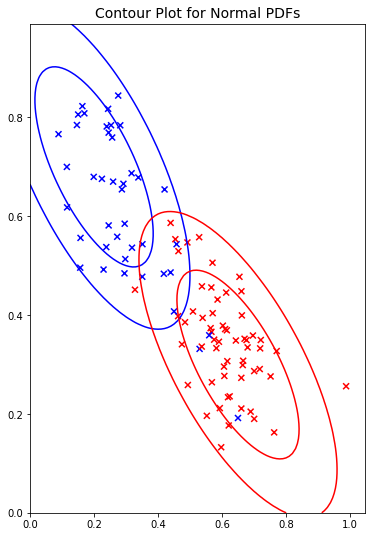

In [8]:
import scipy.stats

# Initialize Normal PDF parameters
mu0 = np.array([0.2, 0.7])
Sigma0 = np.array([[0.015, -0.011], [-0.011, 0.018]])
mvn0 = scipy.stats.multivariate_normal(mu0, Sigma0)

mu1 = np.array([0.65, 0.3])
Sigma1= np.array([[0.016, -0.011], [-0.011, 0.016]])
mvn1 = scipy.stats.multivariate_normal(mu1, Sigma1)

x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

# Specify Confidence Levels
p = [0.95, 0.68]
levels_0 = list(map(lambda x: np.exp((-0.5) * scipy.stats.chi2.ppf(x, 2)) * (np.linalg.det(2 * np.pi * Sigma0))**(-1/2), 
        p))
levels_1 = list(map(lambda x: np.exp((-0.5) * scipy.stats.chi2.ppf(x, 2)) * (np.linalg.det(2 * np.pi * Sigma1))**(-1/2), 
        p))

# Plot our contours
plt.rcParams['figure.figsize'] = [6, 9]
plt.contour(x, y, mvn0.pdf(pos), levels = levels_0, colors = 'blue')
plt.contour(x, y, mvn1.pdf(pos), levels = levels_1, colors = 'red')
plt.scatter(points[:,0], points[:,1], c = labels, cmap = matplotlib.colors.ListedColormap(colors), marker = "x")
plt.title('Contour Plot for Normal PDFs', fontsize = 14)

4. Do the data appear normal? There should be at least one obvious outlier. Add an annotation to your figure indicating one or more such outlier(s).

Text(0.5,1,'Contour Plot for Normal PDFs (Show Outlliers)')

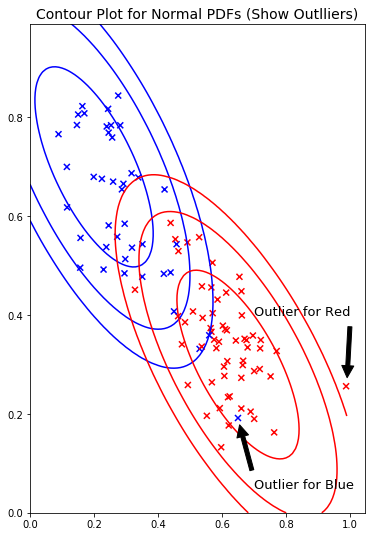

In [9]:
# Create three standard deviation contours
p = [0.99, 0.95, 0.68]
levels_0 = list(map(lambda x: np.exp((-0.5) * scipy.stats.chi2.ppf(x, 2)) * (np.linalg.det(2 * np.pi * Sigma0))**(-1/2), 
        p))
levels_1 = list(map(lambda x: np.exp((-0.5) * scipy.stats.chi2.ppf(x, 2)) * (np.linalg.det(2 * np.pi * Sigma1))**(-1/2), 
        p))

# Plot our contours and label the outliers
plt.rcParams['figure.figsize'] = [6, 9]
plt.contour(x, y, mvn0.pdf(pos), levels = levels_0, colors = 'blue')
plt.contour(x, y, mvn1.pdf(pos), levels = levels_1, colors = 'red')
plt.scatter(points[:,0], points[:,1], c = labels, cmap = matplotlib.colors.ListedColormap(colors), marker = "x")
plt.annotate("Outlier for Blue",
               xy = (0.65, 0.19),
               xytext = (.7, 0.05),
               arrowprops = dict(facecolor = 'black', shrink = 0.1),
               fontsize = 13)
plt.annotate("Outlier for Red",
               xy = (0.99, 0.26),
               xytext = (0.7, 0.4),
               arrowprops = dict(facecolor = 'black', shrink = 0.1),
               fontsize = 13)
plt.title('Contour Plot for Normal PDFs (Show Outlliers)', fontsize = 14)

- *The data appears normal. Each Normal PDF contain most of its points within 3 standard deviations with the exception of one outlier.*

### Problem 3: Conway’s Game of Life
#### ([Back to Top](#Table-of-Contents))

Conway’s Game of Life (https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a classic example of a *cellular automaton* devised by mathematician John Conway. The game is a classic example of how simple rules can give rise to complex behavior. The game is played on an $m$-by-$n$ board, which we will represent as an $m$-by-$n$ matrix. The game proceeds in steps. At any given time, each cell of the board (i.e., entry of our matrix), is either alive (which we will represent as a $1$) or dead (which we will represent as a $0$). At each step, the board evolves according to a few simple rules:
- A live cell with fewer than two live neighbors becomes a dead cell. 
- A live cell with more than three live neighbors becomes a dead cell. 
- A live cell with two or three live neighbors remains alive.
- A dead cell with exactly three live neighbors becomes alive.
- All other dead cells remain dead.

The neighbors of a cell are the $8$ cells adjacent to it, i.e., left, right, above, below, upper-left, lower-left, upper-right and lower-right. We will follow the convention that the board is *toroidal*, so that using matrix-like notation (i.e., the cell $(0,0)$ is in the upper-left of the board and the first coordinate specifies a row), the upper neighbor of the cell $(0,0)$ is $(m − 1,0)$, the right neighbor of the cell $(m − 1,n − 1)$ is $(m − 1,0)$, etc. That is, the board “wraps around”. **Note:** you are not required to use this matrix-like indexing. It’s just what I chose to use to explain the toroidal property.
1. Write a function `is_valid_board` that takes an $m$-by-$n$ `numpy` array (i.e., an `ndarray`) as its only argument and returns a Python Boolean that is `True` if and only if the argument is a valid representation of a Game of Life board. A valid board is any two-dimensional numpy `ndarray` with all entries either $0.0$ and $1.0$.

In [10]:
def is_valid_board(board):
    if not isinstance(board, np.ndarray):
        return False
    if not np.all((board == 0.0) + (board == 1.0)):
        return False
    
    return True

2. Write a function called `gol_step` that takes an $m$-by-$n$ `numpy` array as its argument and returns another `numpy` array of the same size (i.e., also $m$-by-$n$), corresponding to the board at the next step of the game. Your function should perform error checking to ensure that the provided argument is a valid Game of Life board.

In [11]:
def countLiveCellsAtIndex(i, j, board):
    m, n = board.shape
    
    # Count number of live cells
    liveCount = 0
    
    if j < (n - 1):
        # Check Right
        liveCount += board[i, j + 1]

        # Check Down, Right
        if i < (m - 1):
            liveCount += board[i + 1, j + 1]

        # Check Up, Right
        if i > 0:
            liveCount += board[i - 1, j + 1]
            
    if j > 0:
        # Check Left
        liveCount += board[i, j - 1]

        # Check Down, Left
        if i < (m - 1):
            liveCount += board[i + 1, j - 1]
            
        # Check up, Left
        if i > 0:
            liveCount += board[i - 1, j - 1]

    # Check Down
    if i < (m - 1):
        liveCount += board[i + 1, j]

    # Check Up
    if i > 0:
        liveCount += board[i - 1, j]
    
    return(liveCount)
    
def gol_step(board):
    if not is_valid_board(board):
        return
    
    m, n = board.shape
    newBoard = np.copy(board)
    for i in range(m):
        for j in range(n):
            # Get number of live neighbors
            liveCount = countLiveCellsAtIndex(i, j, board)
            
            # Determine from rules if cell should die, stay live, or become alive
            if board[i, j] == 1:
                if liveCount < 2 or liveCount > 3:
                    newBoard[i, j] = 0
            
            elif board[i, j] == 0 and liveCount == 3:
                newBoard[i, j] = 1
                
    return newBoard

3. Write a function called `draw_gol_board` that takes an $m$-by-$n$ `numpy` array (i.e., an `ndarray`) as its only argument and draws the board as an $m$-by-$n$ set of tiles, colored black or white correspond to whether the corresponding cell is alive or dead, respectively. Your plot should *not* have any grid lines, nor should it have any axis labels or axis ticks. **Hint:** see the functions `plt.xticks()` and `plt.yticks()` for changing axis ticks. **Hint:** you may find the function `plt.get_cmap` to be useful for working with the `matplotlib Colormap` objects.

In [12]:
def draw_gol_board(board):
    colors = ["white", "black"]
    plt.rcParams['figure.figsize'] = [4, 4]
    plt.imshow(board, cmap = matplotlib.colors.ListedColormap(colors))
    plt.xticks([])
    plt.yticks([])

4. Create a $20$-by-$20$ numpy array corresponding to a Game of Life board in which all cells are dead, with the exception that the top-left 5-by-5 section of the board looks like this:
<img src="https://raw.githubusercontent.com/israeldi/israeldi.github.io/master/Stats507/Homeworks/israeldi_hw5/board.png" alt="Drawing" style="width: 200px;"/>

Plot this $20$-by-$20$ board using `draw_gol_board`.

In [13]:
board20_20 = np.zeros((20, 20))
topLeft = np.array(
    [[0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0],
     [0, 0, 0, 1, 0],
     [0, 1, 1, 1, 0],
     [0, 0, 0, 0, 0]])
board20_20[0:5, 0:5] = topLeft

5. Generate a plot with $5$ subplots, arranged in a $5$-by-$1$ grid, showing the first five steps of the Game of Life when started with the board you just created, with the steps ordered from top to bottom, The figure in the $5$-by-$5$ sub-board above is called a *glider*, and it is interesting in that, as you can see from your plot, it seems to move along the board as you run the game.

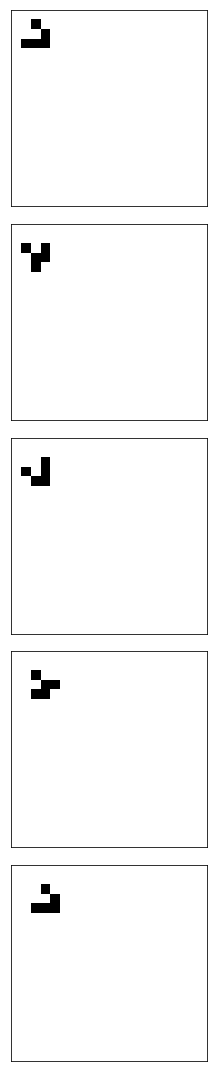

In [14]:
# Plot our 5 subplots
n = 5
for i in range(n):
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.subplot(int(str(n) + '1' + str(i + 1)))
    draw_gol_board(board20_20)
    board20_20 = gol_step(board20_20)
_ = plt.tight_layout()

**Optional additional exercise:** create a function that takes two arguments, a Game of Life board and a number of steps, and generates an animation of the game as it runs for the given number of steps.

In [21]:
import matplotlib.animation as animation
from IPython.display import HTML

def animateBoard(n, board):
    fig = plt.figure()
    
    # ims is a list of lists, each row is a list of artists to draw in the
    # current frame; here we are just animating one artist, the image, in
    # each frame
    ims = []
    for i in range(n):
        colors = ["white", "black"]
        plt.rcParams['figure.figsize'] = [4, 4]
        im = plt.imshow(board, cmap = matplotlib.colors.ListedColormap(colors))
        plt.xticks([])
        plt.yticks([])
        board = gol_step(board)
        ims.append([im])
    
    plt.close()
    ani = animation.ArtistAnimation(fig, ims, interval= 80, blit=True)

    matplotlib.rcParams['animation.writer'] = 'avconv'
    # ani.save('gol.mp4')
    return(HTML(ani.to_html5_video()))

board20_20 = np.zeros((20, 20))
topLeft = np.array(
    [[0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0],
     [0, 0, 0, 1, 0],
     [0, 1, 1, 1, 0],
     [0, 0, 0, 0, 0]])

board20_20[0:5, 0:5] = topLeft
animateBoard(90, board20_20)